## 0. Prepare input and target data for model

In [1]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

# load the dataset
def load_dataset(filename, column):
	# load the dataset as a pandas DataFrame
	df = read_csv(filename)
	df_shuffled = df.sample(frac=1)
	# split into input (X) and output (y) variables & convert to numPy array
	X = df_shuffled.drop(column, axis = 1)
	y = df_shuffled[column]
	return X, y

# prepare input data
def prepare_inputs(X):
	oe = OrdinalEncoder()
	oe.fit(X)
	X_enc = oe.transform(X)
		
	# scale dataset
	scaler = preprocessing.MinMaxScaler()
	X_enc_scaled = scaler.fit_transform(X_enc)
	return X_enc_scaled

# prepare target
def prepare_targets(y):
	le = LabelEncoder()
	le.fit(y)
	y_enc = le.transform(y)
	return y_enc

# load the dataset
X, y = load_dataset('mushrooms.csv', 'class')
X = X.drop('veil-type', axis = 1)

# prepare input data
X_enc = prepare_inputs(X)
# prepare output data
y_enc = prepare_targets(y)

# split into train and test sets; 80/20 split
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.2, random_state=1)

## 1. Logistic Regression

#### 1a. Logistic Regression Computation

number of selected features:  10 

Accuracy using logistic regression (chi2): 94.65

Classification Report for logistic regression (chi2): 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       845
           1       0.96      0.93      0.94       780

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion matrix for logistic regression (chi2): 


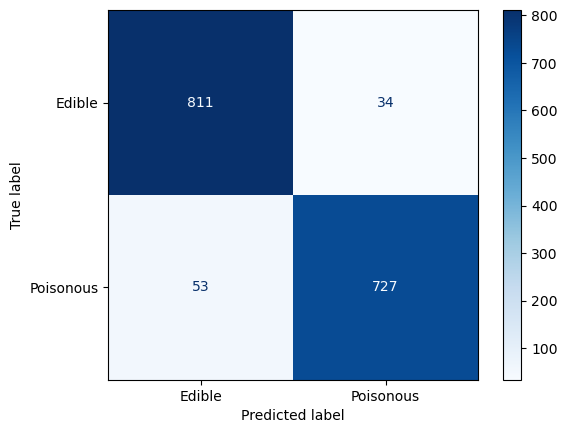

<Figure size 1920x1440 with 0 Axes>

Accuracy using logistic regression (mutual information): 91.82

Classification Report for logistic regression (mutual information): 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       845
           1       0.90      0.93      0.92       780

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion matrix for logistic regression (mutual information): 


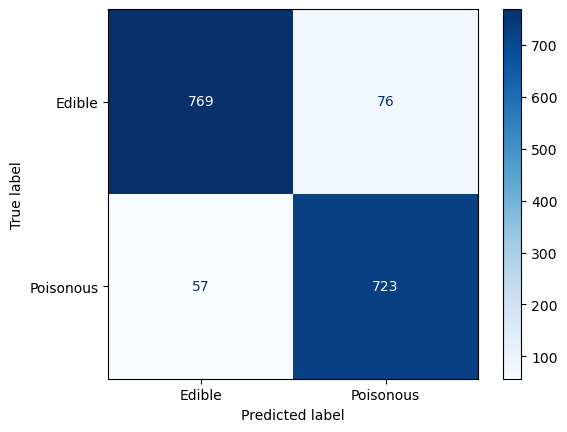

<Figure size 1920x1440 with 0 Axes>

Accuracy using logistic regression (all features): 95.45

Classification Report for logistic regression (all features): 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       845
           1       0.96      0.95      0.95       780

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion matrix for logistic regression (all features): 


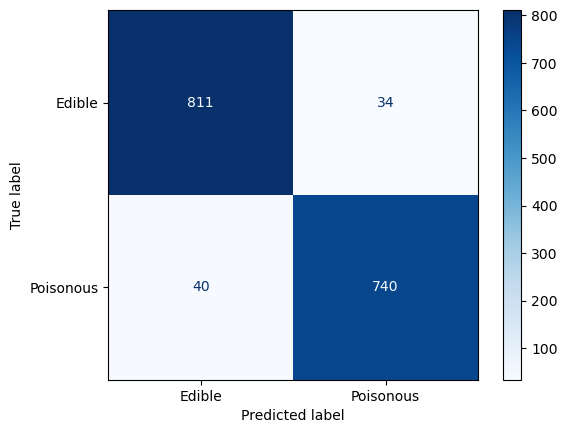

<Figure size 1920x1440 with 0 Axes>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# define how many features to select
number_of_features = 10
print('number of selected features: ', number_of_features, '\n')

# Feature reduction function
def select_features(X_train, y_train, X_test, reduction_func):
 fs = SelectKBest(score_func=reduction_func, k=number_of_features)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs

def display_metrics(y, yhat, model):
 accuracy = accuracy_score(y, yhat)
 print('Accuracy using %s: %.2f' % (model, accuracy*100))

 print("\nClassification Report for %s: " % model)
 print(classification_report(y, yhat))

 print("Confusion matrix for %s: " % model)
 cm = confusion_matrix(y, yhat)  # actual, pred
 disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Edible', 'Poisonous'])
 disp.plot(cmap=plt.cm.Blues)
 plt.figure(dpi=300)
 plt.show()


#### FEATURE SELECTION ####

# chi2 feature selection
X_train_fs_chi2, X_test_fs_chi2 = select_features(X_train_enc, y_train_enc, X_test_enc, chi2)

# mutual information feature selection
X_train_fs_mi, X_test_fs_mi = select_features(X_train_enc, y_train_enc, X_test_enc, mutual_info_classif)

#### MODEL FITTING ####

model = LogisticRegression(solver='lbfgs', max_iter=300)

# Chi2 features
model.fit(X_train_fs_chi2, y_train_enc)
pred = model.predict(X_test_fs_chi2)

display_metrics(y_test_enc, pred, "logistic regression (chi2)")

# Mutual Information features
model.fit(X_train_fs_mi, y_train_enc)
pred = model.predict(X_test_fs_mi)
accuracy = accuracy_score(y_test_enc, pred)

display_metrics(y_test_enc, pred, "logistic regression (mutual information)")

# all features
model.fit(X_train_enc, y_train_enc)
pred = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, pred)

display_metrics(y_test_enc, pred, "logistic regression (all features)")

#### 1b. Logistic Regression K-fold Cross Validation (all features)

In [3]:
# Using sklearn function cross_validate()
from sklearn.model_selection import cross_validate

CV = cross_validate(model, X_enc, y_enc, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

accuracy = sum(CV['test_accuracy']) / len(CV['test_accuracy'])

print('\nAverage Accuracy = ', accuracy)
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

print('\nK-fold Cross Validation Accuracy (k=10):', accuracy*100)

Accuracy
[0.95571956 0.95448954 0.95325953 0.95448954 0.93965517 0.94827586
 0.94334975 0.94950739 0.94211823 0.94704433]
MSE
[0.04428044 0.04551046 0.04674047 0.04551046 0.06034483 0.05172414
 0.05665025 0.05049261 0.05788177 0.05295567]

Average Accuracy =  0.9487908918498051
Average MSE =  0.051209108150194804

K-fold Cross Validation Accuracy (k=10): 94.87908918498051


## 2. Support Vector Machines

#### 2a. SVM Computation

Accuracy using RBF Kernel SVM: 100.00

Classification Report for RBF Kernel SVM: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix for RBF Kernel SVM: 


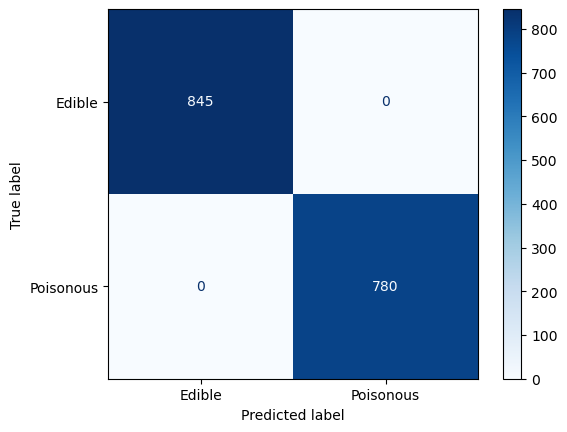

<Figure size 1920x1440 with 0 Axes>

Accuracy using Polynomial Kernel SVM: 100.00

Classification Report for Polynomial Kernel SVM: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix for Polynomial Kernel SVM: 


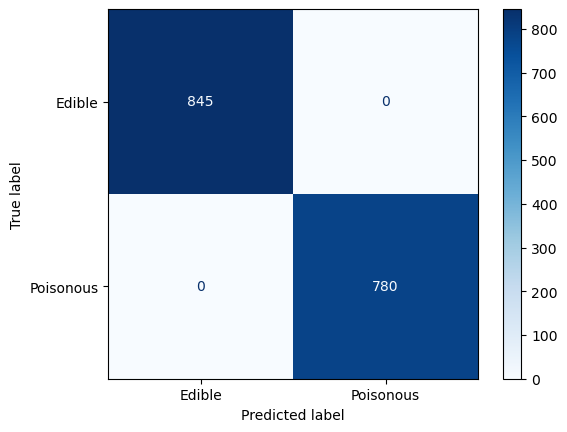

<Figure size 1920x1440 with 0 Axes>

In [4]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf', gamma=0.5).fit(X_train_enc, y_train_enc)
poly = svm.SVC(kernel='poly', degree=3).fit(X_train_enc, y_train_enc)

rbf_pred = rbf.predict(X_test_enc)
poly_pred = poly.predict(X_test_enc)

display_metrics(y_test_enc, rbf_pred, "RBF Kernel SVM")
display_metrics(y_test_enc, poly_pred, "Polynomial Kernel SVM")

#### 2b. SVM K-fold Cross Validation

In [5]:
# Using sklearn function cross_validate()
CV = cross_validate(rbf, X_enc, y_enc, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

accuracy = sum(CV['test_accuracy']) / len(CV['test_accuracy'])

print('\nAverage Accuracy = ', accuracy)
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

print('\nK-fold Cross Validation Accuracy (k=10):', accuracy*100)

Accuracy
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MSE
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Average Accuracy =  1.0
Average MSE =  0.0

K-fold Cross Validation Accuracy (k=10): 100.0


In [6]:
# Using sklearn function cross_validate()
CV = cross_validate(poly, X_enc, y_enc, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

accuracy = sum(CV['test_accuracy']) / len(CV['test_accuracy'])

print('\nAverage Accuracy = ', accuracy)
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

print('\nK-fold Cross Validation Accuracy (k=10):', accuracy*100)

Accuracy
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MSE
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Average Accuracy =  1.0
Average MSE =  0.0

K-fold Cross Validation Accuracy (k=10): 100.0


## 3. Neural Network

#### 3a. Hyperparameter tuning

In [7]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

# Performing some hyperparameter tuning (it can take aorund 3 minutes)
max_iterations = [200,500,800,1000]
hidden_layer_siz = [(100,), (50,), (25, 7), (12, 10), (5, 7), (200,)]
learning_rates = 0.1 * np.arange(1, 4)
param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

#set model
mlp = MLPClassifier(solver = 'adam', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

# Train the model with grid search
grid_result = grid.fit(X_train_enc, y_train_enc)

# Print the best hyperparameters
print("Best parameters: ", grid.best_params_)



Best parameters:  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 200}


#### 3b. Fitting the model with the tuned hyperparameters

Accuracy using Neural Network: 100.00

Classification Report for Neural Network: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion matrix for Neural Network: 


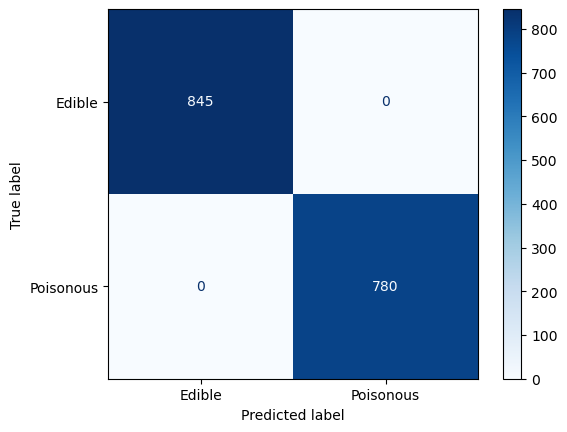

<Figure size 1920x1440 with 0 Axes>

In [8]:
#set model with the best hyperparameters that we just computed
mlp = MLPClassifier(solver = 'adam', random_state = 42, activation = 'logistic', learning_rate_init = grid_result.best_params_["learning_rate_init"], batch_size = 100, hidden_layer_sizes = grid_result.best_params_["hidden_layer_sizes"], max_iter = grid_result.best_params_["max_iter"])

mlp.fit(X_train_enc, y_train_enc)
pred = mlp.predict(X_test_enc)

display_metrics(y_test_enc, pred, "Neural Network")

#### 3c. Neural Network K-fold Cross Validation

In [9]:
# Using sklearn function cross_validate()
CV = cross_validate(mlp, X_enc, y_enc, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

accuracy = sum(CV['test_accuracy']) / len(CV['test_accuracy'])

print('\nAverage Accuracy = ', accuracy)
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

print('\nK-fold Cross Validation Accuracy (k=10):', accuracy*100)

Accuracy
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MSE
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Average Accuracy =  1.0
Average MSE =  0.0

K-fold Cross Validation Accuracy (k=10): 100.0
